# **HR Data Topica Group - Exploratory Data Analysis (EDA)**

## **Step 1: Import data**

In [1]:
import pandas as pd

In [2]:
hr_df = pd.read_csv('HR_DATA.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import warnings

# Ignore all warnings (not recommended for production code)
warnings.simplefilter(action='ignore')

## **Step 2: Data Exploration and Data Profiling**

### **2.1. Data Cleaning and Profiling**

#### **Create hr_df1 dataframe**

In [5]:
hr_df.columns

Index(['employee_code', 'employee_first_name', 'employee_last_name',
       'employee_work_date', 'ID', 'statement_employee_code', 'statement_type',
       'statement_code', 'statement_valid_date', 'statement_expired_date',
       'statement_created_date', 'statement_status', 'statement_note',
       'statement_file_scan', 'statement_name', 'HRC', 'PT', 'CDT', 'HD', 'SP',
       'CH', 'HRB', 'DV', 'CB', 'NG', 'work_location', 'KN', 'DVC', 'PC100',
       'PC200', 'PC300', 'PC400', 'PC900', 'KH100', 'KH200', 'KH300', 'HAM',
       'NG_PHU', 'created_at', 'modified_at', 'PB', 'ETL_timestamp'],
      dtype='object')

In [6]:
usecols = ['employee_code', 'employee_work_date', 'statement_type',
       'statement_code', 'statement_valid_date','statement_name', 'PT', 'CB', 'NG','work_location', 'KH200']
hr_df1 = hr_df[usecols]
hr_df1.head(2)

,employee_code,employee_work_date,statement_type,statement_code,statement_valid_date,statement_name,PT,CB,NG,work_location,KH200
0,10000000,7/30/2019,ZE - Đánh giá,10000000/ANHTN13/20190928/ZE-EA/10000000/VA00/...,9/28/2019,EA - Đánh giá sau thử việc,TE - Công ty CP giáo dục Topica English,OX2-Chuyên viên,WMT-Chuyên gia Chạy số,Hà Nội,TRANGTTK
1,10000019,1/8/2019,ZA - Tuyển mới,10000019/MINHL/20190801/ZA-AD/10000019/VA00/99...,1/8/2019,AD - Tuyển mới NV định biên còn thiếu ko thử việc,TE - Công ty CP giáo dục Topica English,CM1-Giám đốc Sản phẩm,IBB-Phân tích dữ liệu,Hà Nội,TUANPM


#### **Fill missing values**

In [7]:
hr_df1['employee_work_date'].fillna('01/01/2019', inplace=True)

#### **Change data type to datetime**

In [8]:
hr_df1['employee_work_date'] = pd.to_datetime(hr_df1['employee_work_date'], format='%m/%d/%Y')
hr_df1['statement_valid_date'] = pd.to_datetime(hr_df1['statement_valid_date'], format='%m/%d/%Y')

In [9]:
hr_df1['statement_valid_date_2'] = pd.to_datetime(hr_df1['statement_code'].str.split('/', expand=True).iloc[:,2], format='%Y%m%d') 
hr_df1['statement_valid_date_2'] = hr_df1['statement_valid_date_2'].fillna(hr_df1['statement_valid_date'])

### **2.2. Data Overview**

**About data:** This dataset contains information on Topica Group's employment situation from 2008 to 2019.

#### **2.2.1. General Findings:**
* Topica's workforce experienced significant annual growth throughout the 2008-2019 period.
* As of 2019, Topica's active workforce consisted of 1,563 employees (comprising 227 managerial staff, 94 experts, and 1,242 employees), with 70% working in Hanoi, 15% in Thailand and 10% in HCM city.
* Additionally, as of 2019, there were 1,023 former employees (inclusing 98 managers, 37 experts, and 888 employees), with 73.5% in Hanoi, 13% in Thailand and 8% in HCM city
* Topica experienced minimal employee turnover prior to 2017 (1 employee in 2017, accounted for 0.1%). However, turnover increased significantly in 2018 (13 employees, accounted for 0.7%) and has surged in 2019 (1,009 employees, accounted for 39%).

#### **No. of employees in/out/turnover throughout the year**

In [10]:
in_series = hr_df1['employee_work_date'].dt.year.value_counts().sort_index()

In [11]:
out_series = hr_df1[hr_df1['statement_type'] == 'ZG - Chấm dứt HĐLĐ'].groupby(hr_df1['statement_valid_date_2'].dt.year).size()

In [12]:
result = pd.concat([in_series, out_series], axis=1)
result.rename(columns={'count':'emp_in', 0:'emp_out'}, inplace=True)
result.fillna(0, inplace=True)
result.index = result.index.astype(int)   # change index data type
result['emp_out'] = result['emp_out'].astype(int)   # change column data type
result.loc[2008, 'running_total'] = 6
for i in range(1, result.shape[0]):
    result.iloc[i,2] = result.iloc[i-1,2] + result.iloc[i,0] - result.iloc[i,1]
result['running_total'] = result['running_total'].astype(int)
result['total_include_out'] = result['running_total'] + result['emp_out']
result['total_include_out'] = result['total_include_out'].astype(int)
result['turnover_rate'] = result['emp_out'] / result['total_include_out'] *100

In [13]:
from matplotlib import pyplot as plt

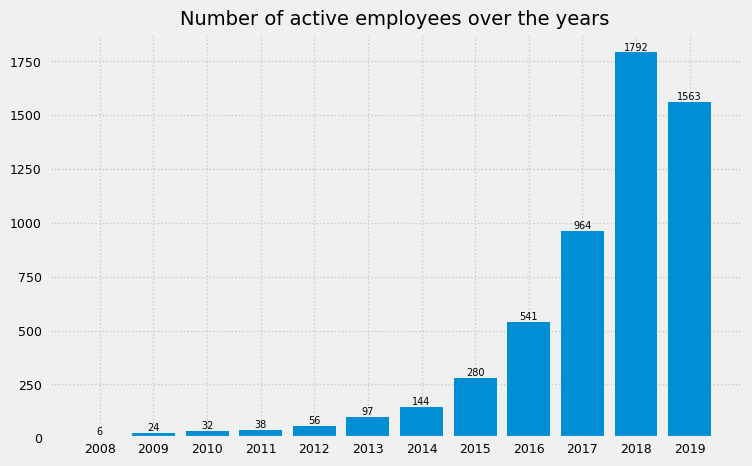

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
bars = plt.bar(height=result['running_total'], x=result.index.astype(str))
plt.title('Number of active employees over the years', fontsize=14)
plt.xticks(fontsize=9)  # Set font size for tick labels on x-axis
plt.yticks(fontsize=9)  # Set font size for tick labels on y-axis
labels = result['running_total'].astype(int)
plt.bar_label(bars, labels, label_type='edge', fontsize=7)
# Enable grid and set linestyle to 'dotted'
ax = plt.gca()  # Get the current axes object
ax.grid(True, linestyle=':')  # linestyle':' for dotted lines
plt.show()

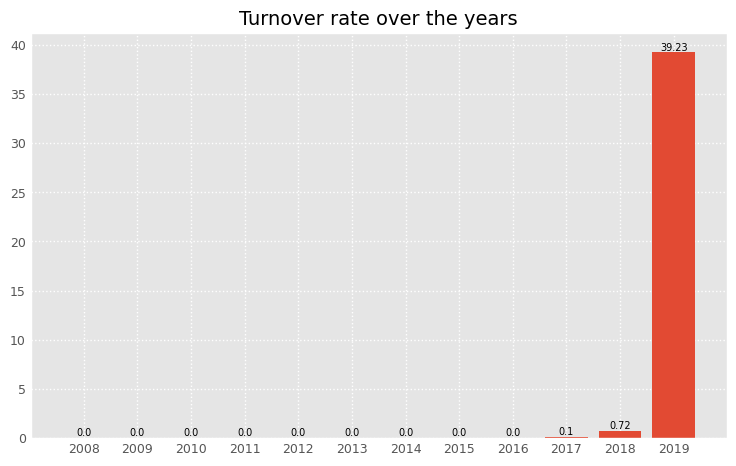

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
bars = plt.bar(height=result['turnover_rate'], x=result.index.astype(str))
plt.title('Turnover rate over the years', fontsize=14)
plt.xticks(fontsize=9)  # Set font size for tick labels on x-axis
plt.yticks(fontsize=9)  # Set font size for tick labels on y-axis
labels = result['turnover_rate'].round(decimals=2)
plt.bar_label(bars, labels, label_type='edge', fontsize=7)
# Enable grid and set linestyle to 'dotted'
ax = plt.gca()  # Get the current axes object
ax.grid(True, linestyle=':')  # linestyle':' for dotted lines
plt.show()

#### **No. of employees grouped by Job Levels**

In [16]:
hr_df1['cb_code'] = hr_df1['CB'].str.split('-', expand=True).iloc[:,0]

In [17]:
cb_list = hr_df1['cb_code'].unique().tolist()

In [18]:
#Jobs levels by positions
management = [cb for cb in cb_list if 'M' in cb]
expert = [cb for cb in cb_list if ('X' in cb and not 'OX' in cb and not 'LX' in cb)]
working_level = [cb for cb in cb_list if ('OX' in cb or 'LX' in cb)]

In [19]:
for index, row in hr_df1.iterrows():
    if row['cb_code'] in management:
        hr_df1.at[index, 'job_level'] = 'Managerial level '
    elif row['cb_code'] in expert:
        hr_df1.at[index, 'job_level'] = 'Expert'
    elif row['cb_code'] in working_level:
        hr_df1.at[index, 'job_level'] = 'Working level'

In [20]:
# No. of active employees 
hr_df1.loc[hr_df1['statement_type']!='ZG - Chấm dứt HĐLĐ']['job_level'].value_counts().reset_index()

,job_level,count
0,Working level,1242
1,Managerial level,227
2,Expert,94


In [21]:
# No. of former employees 
hr_df1.loc[hr_df1['statement_type']=='ZG - Chấm dứt HĐLĐ']['job_level'].value_counts().reset_index()

,job_level,count
0,Working level,888
1,Managerial level,98
2,Expert,37


#### **No. of employees grouped by work location**

In [22]:
hr_df1.loc[hr_df1['statement_type']!='ZG - Chấm dứt HĐLĐ']['work_location'].value_counts().reset_index()

,work_location,count
0,Hà Nội,1095
1,Thái Lan,232
2,Không rõ,158
3,TP Hồ Chí Minh,76
4,Philippines,2


In [23]:
hr_df1.loc[hr_df1['statement_type']=='ZG - Chấm dứt HĐLĐ']['work_location'].value_counts().reset_index()

,work_location,count
0,Hà Nội,752
1,Thái Lan,133
2,TP Hồ Chí Minh,83
3,Không rõ,55


#### **2.2.2. About current workforce (in 2019)**
* In Topica's current workforce, 31% of employees have less than one year of tenure, 46% have been with the company for 1-3 years, and 16% have 3-5 years of tenure. The remaining employees (more than 5 years of tenure) make up less than 8% of the workforce.
* Workforce size by job functions and job levels: Other Specialist and Consulting Specialist functions lead the pack in employee headcount, with 319 and 256 employees respectively.

#### **No. of employees grouped by work tenure**

In [24]:
# Define the conditions
def calculate_tenure(row):
    if row['statement_type'] == 'ZG - Chấm dứt HĐLĐ':
        return (row['statement_valid_date_2'] - row['employee_work_date']).days
    else:
        return (pd.to_datetime('2019-12-31') - row['employee_work_date']).days

# Apply the function to create col_4
hr_df1['tenure_in_day'] = hr_df1.apply(calculate_tenure, axis=1)

In [25]:
# Define cut points (bins) for tenure categories
create_bins = [-float('inf'), 365, 1095, 1825, 2555, 3285, float('inf')]  # Use float('inf') for the upper bound

# Define bin labels (categories)
bin_labels = ["<1y", "1-3y", "3-5y", "5-7y", "7-9y", ">9y"]

# Create the tenure bin column using cut and pd.Categorical
hr_df1['tenure_in_year'] = pd.cut(hr_df1['tenure_in_day'], bins=create_bins, labels=bin_labels)

In [26]:
hr_df1_active = hr_df1.loc[hr_df1['statement_type']!='ZG - Chấm dứt HĐLĐ']

In [27]:
tenure_active_df = hr_df1_active['tenure_in_year'].value_counts().reset_index()
tenure_active_df['proportion'] = (tenure_active_df['count'] / sum(tenure_active_df['count']) * 100).round(decimals=2)
tenure_active_df

,tenure_in_year,count,proportion
0,1-3y,718,45.94
1,<1y,480,30.71
2,3-5y,248,15.87
3,5-7y,69,4.41
4,>9y,29,1.86
5,7-9y,19,1.22


#### **No. of employees grouped by job levels and functions**

In [28]:
job_lv_by_ng_active = hr_df1_active.pivot_table(index='job_level', columns='NG', values='employee_code', aggfunc='count')
job_lv_by_ng_active.fillna(0, inplace=True)
job_lv_by_ng_active = job_lv_by_ng_active.astype(int)
job_lv_by_ng_active

NG,FFI-Chuyên gia Tài chính,GCE-Chuyên gia Chăm sóc khách hàng bên ngoài,GET-Chuyên gia Tuyển dụng và đào tạo Giảng viên,GGO-Chuyên gia Khác,GOO-Chuyên gia Vận hành Online,HHB-Chuyên gia Nhân sự,IBB-Phân tích dữ liệu,ITS-Chuyên gia Phần mềm,IUU-Chuyên gia Thiết kế UI/ UX hoặc Video,WMT-Chuyên gia Chạy số,WSS-Chuyên gia Tư vấn tuyển sinh
job_level,,,,,,,,,,,
Expert,2,1,1,44,0,2,1,40,0,3,0
Managerial level,1,7,3,121,12,7,1,28,4,18,25
Working level,39,77,41,319,53,62,1,179,25,190,256


In [29]:
import seaborn as sns

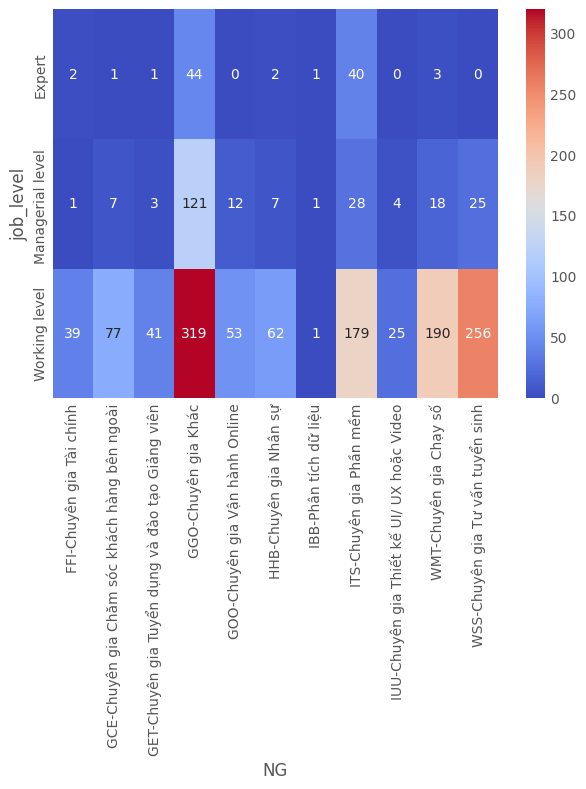

In [30]:
sns.heatmap(job_lv_by_ng_active, cmap='coolwarm', annot=True, fmt=".0f")
plt.show()

### **2.3. Deep-dive analysis of employment turnover in 2019**

#### **Key findings**

_We will focus on analyzing the group of employees with abnormally high attrition rates in 2019._

**Monthly Trends:**
* Employee attrition was concentrated in the second and third quarters of 2019, peaking in May and July with 132 and 138 departures, respectively.
* This suggests a trend of employees leaving mid-year to secure new opportunities before the end of the year.

**Reasons for Separation:**
* Voluntary terminations were alarmingly high in 2019, reaching nearly 900 employees, while 102 separations were through mutual agreement.
* The company initiated termination for 13 employees.

**Employee Tenure:**
* Employee retention was low, with 54% of departures having less than one year of service.
* A significant portion (34%) of employees left after 1-3 years of tenure.
  
**Managerial Impact:**
* The top three managers with the highest turnover rates were QUANGHD, NAMFON2, and HAONT2 (each with 78-80 departures in 2019).
  
**Job Function and Level:**
* Despite requiring a large workforce, the Consulting Specialist function had the highest turnover, with 347 departures.

**Concluded Insights:**
* **Mid-year attrition:** Employees are proactively seeking new opportunities before the year-end, highlighting the need for improved retention strategies.
* **High voluntary terminations:** The prevalence of voluntary terminations raises concerns about employee satisfaction and engagement.
* **Low tenure:** A significant portion of departures come from employees with less than three years of tenure, indicating retention challenges among newer employees.
* **Managerial impact:** Specific managers have higher turnover rates, requiring targeted interventions.
* **Consulting Specialist function:** Despite high staffing needs, this function has the highest turnover.

In [31]:
hr_df1_inactive = hr_df1.loc[(hr_df1['statement_type']=='ZG - Chấm dứt HĐLĐ')& (hr_df1['statement_valid_date_2'].dt.year ==2019)]

#### **Workforce attrition over the months**

In [32]:
count_by_month = hr_df1_inactive.groupby(hr_df1_inactive['statement_valid_date_2'].dt.month)['employee_code'].count().reset_index()
count_by_month.columns = ['valid_month', 'total_emp']
count_by_month['proportion'] = count_by_month['total_emp'] / sum(count_by_month['total_emp']) *100
count_by_month

,valid_month,total_emp,proportion
0,1,96,9.514371
1,2,78,7.730426
2,3,84,8.325074
3,4,115,11.397423
4,5,132,13.082260
5,6,105,10.406343
6,7,138,13.676908
7,8,127,12.586720
8,9,93,9.217047
9,10,41,4.063429


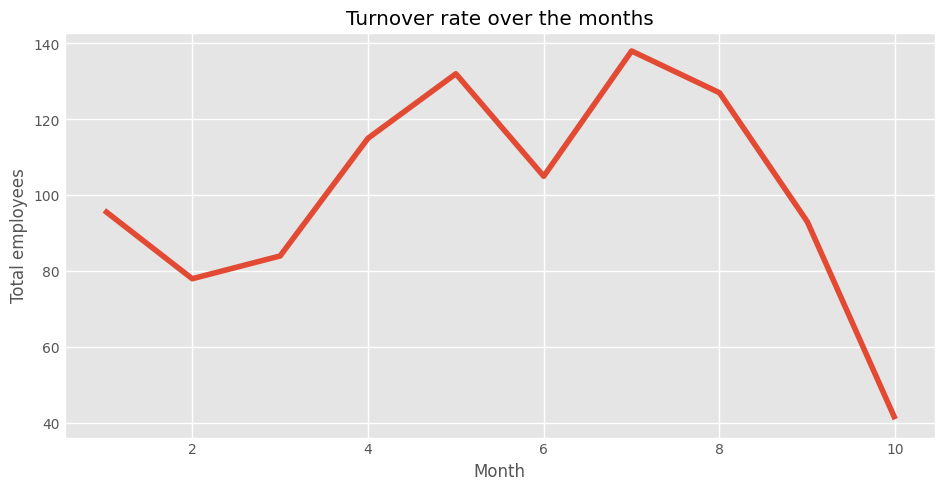

In [33]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=count_by_month['valid_month'], y= count_by_month['total_emp'], data=count_by_month)
plt.title("Turnover rate over the months")
plt.xlabel("Month")
plt.ylabel("Total employees")
plt.grid(True)
plt.show()

#### **Workforce attrition grouped by reasons**

In [34]:
reasons = hr_df1_inactive['statement_name'].value_counts().reset_index()
reasons

,statement_name,count
0,GA - Người lao động đơn phương,894
1,GC - Thỏa thuận,102
2,GB - Công ty đơn phương,13


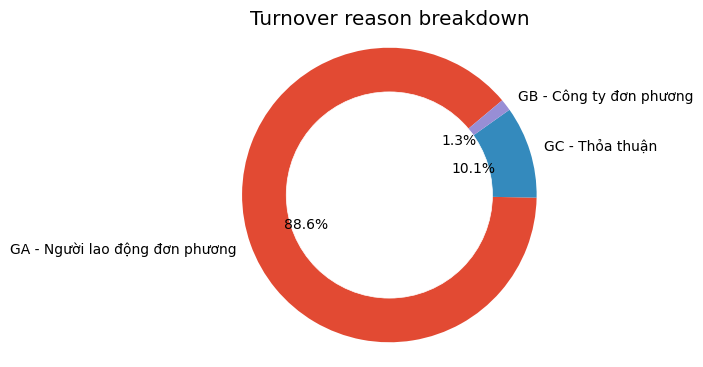

In [35]:
# Create the pie chart
plt.figure(figsize=(4, 4))  # Adjust figure size for better readability (optional)
plt.pie(reasons['count'], labels=reasons['statement_name'], autopct="%1.1f%%", startangle=40, textprops = {"fontsize":10})  # Customize as needed

# Create circle object for donut hole
center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(center_circle)

# Add labels and title (optional)
plt.title("Turnover reason breakdown")
plt.axis('equal')  # Equal aspect ratio ensures a circular shape

plt.show()

#### **Workforce attrition grouped by tenure**

In [36]:
tenure = hr_df1_inactive['tenure_in_year'].value_counts().reset_index()
tenure['proportion'] = tenure['count'] / sum(tenure['count']) * 100
tenure

,tenure_in_year,count,proportion
0,<1y,545,54.013875
1,1-3y,345,34.192270
2,3-5y,99,9.811695
3,5-7y,14,1.387512
4,>9y,4,0.396432
5,7-9y,2,0.198216


#### **Workforce attrition grouped by managers**

In [37]:
hr_df1_2019 = hr_df1.loc[hr_df1['statement_valid_date_2'].dt.year==2019]

In [38]:
manager_df = hr_df1_2019.pivot_table(values='employee_code', columns='statement_type', index='KH200', aggfunc='count')
manager_df.sort_values('ZG - Chấm dứt HĐLĐ', ascending = False).head(10)
manager_df = manager_df.fillna(0)
#manager_df['total'] = pivot_df.sum(axis=1)
manager_df = manager_df.sort_values('ZG - Chấm dứt HĐLĐ', ascending=False).head(10)

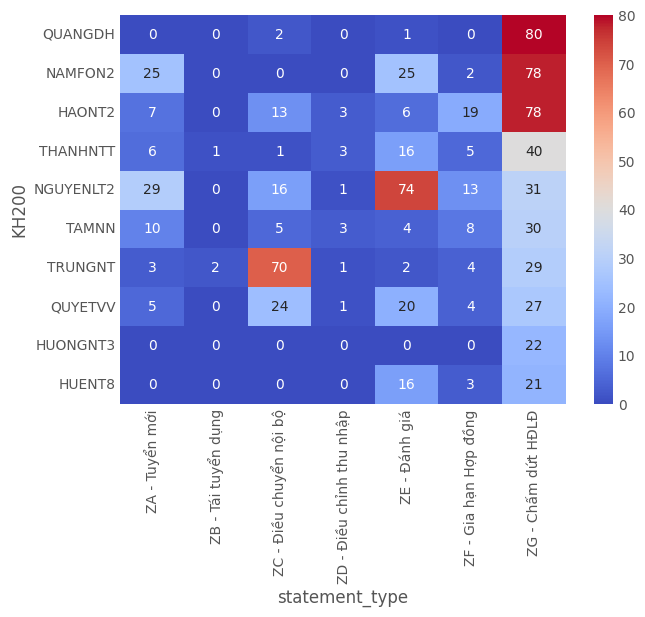

In [39]:
sns.heatmap(manager_df, cmap='coolwarm', annot=True, fmt=".0f")
plt.show()

#### **Workforce attrition grouped by job levels and functions**

In [40]:
job_lv_by_ng_inactive = hr_df1_inactive.pivot_table(index='job_level', columns='NG', values='employee_code', aggfunc='count')
job_lv_by_ng_inactive.fillna(0, inplace=True)
job_lv_by_ng_inactive = job_lv_by_ng_inactive.astype(int)
job_lv_by_ng_inactive

NG,FFI-Chuyên gia Tài chính,GCE-Chuyên gia Chăm sóc khách hàng bên ngoài,GET-Chuyên gia Tuyển dụng và đào tạo Giảng viên,GGO-Chuyên gia Khác,GOO-Chuyên gia Vận hành Online,HHB-Chuyên gia Nhân sự,ITS-Chuyên gia Phần mềm,IUU-Chuyên gia Thiết kế UI/ UX hoặc Video,WMT-Chuyên gia Chạy số,WSS-Chuyên gia Tư vấn tuyển sinh
job_level,,,,,,,,,,
Expert,1,0,0,20,0,1,12,0,3,0
Managerial level,3,5,1,52,4,5,8,0,6,8
Working level,23,57,47,119,90,21,66,9,101,347


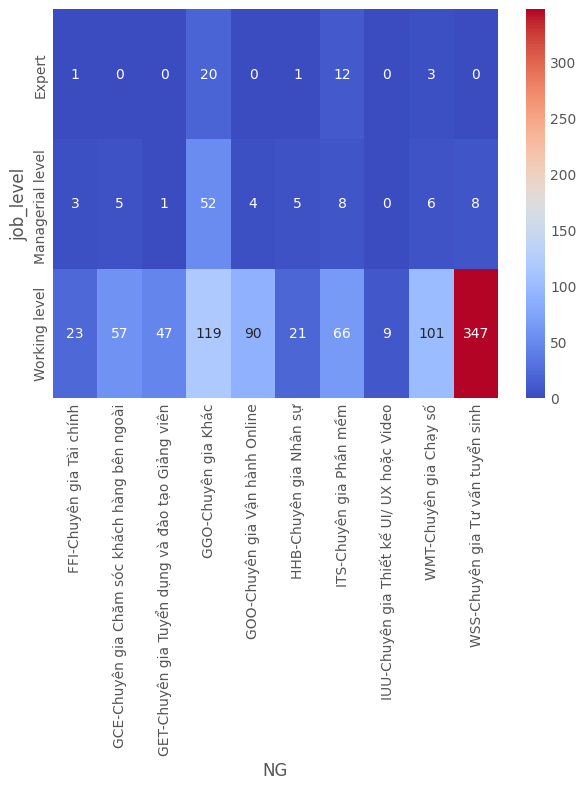

In [41]:
sns.heatmap(job_lv_by_ng_inactive, cmap='coolwarm', annot=True, fmt=".0f")
plt.show()